In [ ]:
!pip install inspyred

In [9]:
# -*- coding: utf-8 -*-

"""
Spyder Editor

http://archive.ics.uci.edu/ml/datasets/Dorothea
http://archive.ics.uci.edu/ml/datasets/Arcene
http://clopinet.com/isabelle/Projects/NIPS2003/

http://www.pykriging.com/
http://deeplearning.net/datasets/
http://www.facom.ufu.br/~backes/pgc204/Aula10-SelecaoAtributos.pdf
https://medium.com/@fabiolenine/como-selecionar-atributos-para-resolver-a-maldi%C3%A7%C3%A3o-da-dimensionalidade-5c810bc8449f

Este é um arquivo de script temporário.
"""

import pylab
from random import *
import pandas as pd
import numpy as np
import inspyred
from sklearn.metrics import accuracy_score, f1_score
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
import time


In [2]:

X_dataset = pd.read_csv('arcene_train.data.txt', sep=' ',header=None).iloc[:, 0:10000]
Y_dataset = pd.read_csv('arcene_train.labels.txt',header=None)

X_test = pd.read_csv('arcene_valid.data.txt', sep=' ',header=None).iloc[:, 0:10000]
Y_test = pd.read_csv('arcene_valid.labels.txt',header=None)

In [3]:
r = Random()
r.seed(42)

#X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset,test_size=0.2)

randbinlist = lambda n: [randint(0, 1) for b in range(1, n + 1)]


def generate_candidates(random, args):
    bits = args.get('num_bits', 8)
    return [random.choice([0, 1]) for i in range(bits)]


def my_constraint_function(candidate):
    """ train and return fscore from model trained """
    col_positions =[]
    for i in range(len(candidate)):
        if candidate[i] == 1:
            col_positions.append(i)

    train = X_dataset.iloc[:, col_positions]
    test = X_test.iloc[:, col_positions]

    clf = svm.SVC(kernel="linear")
    model = clf.fit(train, np.ravel(Y_dataset))
    predictions = model.predict(test)

    #print("{} {} ".format(candidate, accuracy_score(Y_test, predictions)))

    feat_norm = 1 - (np.count_nonzero(candidate)-1)/(10000-1)
    acc = accuracy_score(np.ravel(Y_test), predictions)
    return (acc + feat_norm) / 2


def my_evaluator(candidates, args):
    fitness = []
    for c in candidates:
        """ append f1_score on fitness trained """
        fitness.append(my_constraint_function(c))
    return fitness

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        200 0.64202520 0.68517501 0.66417491 0.66427522 0.00819189

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        400 0.65197469 0.69172467 0.66754975 0.66827500 0.00798904

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        600 0.65742474 0.69172467 0.67077507 0.67128731 0.00739650

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        800 0.65657465 0.69562506 0.67305005 0.67392408 0.00751962

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        36       7400 0.69562556 0.72507600 0.71460046 0.71429094 0.00595181

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        37       7600 0.69842534 0.72507600 0.71445094 0.71410144 0.00602116

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        38       7800 0.69992549 0.72577607 0.71582558 0.71503422 0.00534640

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        39       8000 0.70227572 0.72577607 0.71615061 0.71541597 0.00519458

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        72      14600 0.71082608 0.73902640 0.72735123 0.72681687 0.00618411

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        73      14800 0.71302630 0.73902640 0.72797629 0.72745389 0.00568573

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        74      15000 0.71417641 0.73902640 0.72695144 0.72703167 0.00577298

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        75      15200 0.71052605 0.73902640 0.72682643 0.72664492 0.00616392

Generation Evaluation      Worst       Best     Median    Average    Std

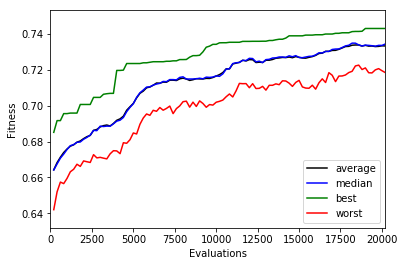

In [17]:
t = time.process_time()

myga = ec.GA(r)
myga.observer = [ec.observers.plot_observer, ec.observers.stats_observer]
#myga.replacer = replacers.plus_replacement
myga.terminator = inspyred.ec.terminators.generation_termination #inspyred.ec.terminators.evaluation_termination
#myga.evaluator = ec.evaluators.parallel_evaluation_mp
#myga.analysis = ec.analysis.allele_plot,ec.analysis.generation_plot

pop = myga.evolve(generator=generate_candidates,
                  evaluator=my_evaluator,
                  pop_size=200,
                  maximize=True,
                  num_elites=3,
                  mutation_rate=0.01,
                  crossover_rate=0.7,
                  #max_evaluations=10000,
                  max_generations=5,
                  num_bits=10000,
                  avaliation = accuracy_score)

pop.sort(reverse=True)
print('Terminated due to {0}.'.format(myga.termination_cause))

In [15]:
pylab.show()

In [19]:
#print(pop[0])

#print(np.count_nonzero(pop[0].candidate))

candidate = pop[0].candidate
col_positions =[]
for i in range(len(candidate)):
    if candidate[i] == 1:
        col_positions.append(i)

train = X_dataset.iloc[:, col_positions]
test = X_test.iloc[:, col_positions]

clf = svm.SVC(kernel="linear")
model = clf.fit(train, np.ravel(Y_dataset))
predictions = model.predict(test)

print("Fitness {}".format(pop[0].fitness))
print("Chromossome normalized factor {}".format(1 - (np.count_nonzero(candidate)-1)/(10000-1)))
print("Accuracy {}".format(accuracy_score(np.ravel(Y_test), predictions)))

print("Feature reduction {}%".format(((10000-np.count_nonzero(pop[0].candidate))/10000)*100))

elapsed_time = time.process_time() - t
print('Time elapsed (hh:mm:ss.ms) {}'.format(elapsed_time))

Fitness 0.7431268126812681
Chromossome normalized factor 0.5362536253625363
Accuracy 0.95
Feature reduction 53.620000000000005%
Time elapsed (hh:mm:ss.ms) 1679.8851736450001
